# Time Series Forecasting with Python

> Data used is the UCI dataset on Air Quality that is a sequence of observations indexed in equi-spaced time intervals.
Metadata and attribute information can be found at https://archive.ics.uci.edu/ml/datasets/air+quality. Missing values have been tagged as -200.

In [60]:
# Importing libraries used.
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import missingno as mno
# A data cleaning library with functions to do EDA checks. .py file in the repository.
import data_cleaning
import datetime

In [98]:
air = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [100]:
# Since all missing values were filled with -200,
# we will replace all values that are -200 with a recognizable null value, np.NaN
air=air.replace(-200, np.NaN)

In [101]:
# CHecking the percentage of null values for each column.
data_cleaning.initial_eda_checks(air)

Total and percentage NaN
                Total   Percent
Unnamed: 16     9471  1.000000
Unnamed: 15     9471  1.000000
NMHC(GT)        8557  0.903495
CO(GT)          1797  0.189737
NO2(GT)         1756  0.185408
NOx(GT)         1753  0.185091
PT08.S1(CO)      480  0.050681
C6H6(GT)         480  0.050681
PT08.S2(NMHC)    480  0.050681
PT08.S3(NOx)     480  0.050681
PT08.S4(NO2)     480  0.050681
PT08.S5(O3)      480  0.050681
T                480  0.050681
RH               480  0.050681
AH               480  0.050681
Time             114  0.012037
Date             114  0.012037


In [102]:
# Checking the columns with more than 90% of their values missing.
data_cleaning.view_column_w_many_nans(air, 0.9)

['NMHC(GT)', 'Unnamed: 15', 'Unnamed: 16']


['NMHC(GT)', 'Unnamed: 15', 'Unnamed: 16']

In [103]:
# Dropping the columns with more than 90% of their values missing.
data_cleaning.drop_columns_w_many_nans(air, .9)
air.head()

['NMHC(GT)', 'Unnamed: 15', 'Unnamed: 16']
['NMHC(GT)', 'Unnamed: 15', 'Unnamed: 16']


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [104]:
air.tail()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


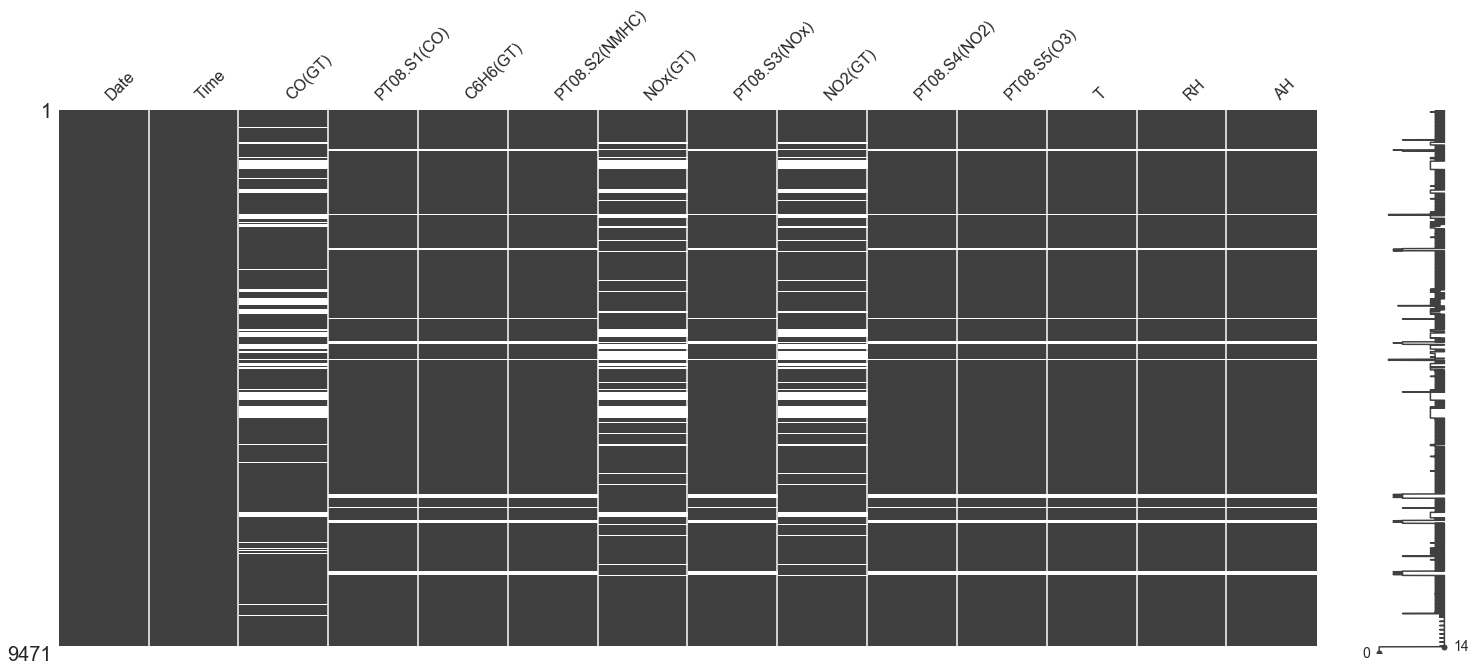

In [105]:
# Plotting  matrix of the location of the remaining missing values. Since they are all
# at the botom of the dataset, we should drop them as they will not affect their continuity.
mno.matrix(air)

In [106]:
# Dropping the null values that have missing dates
air=air[air['Date'].notnull()]
data_cleaning.initial_eda_checks(air)

Total and percentage NaN
                Total   Percent
CO(GT)          1683  0.179865
NO2(GT)         1642  0.175484
NOx(GT)         1639  0.175163
AH               366  0.039115
RH               366  0.039115
T                366  0.039115
PT08.S5(O3)      366  0.039115
PT08.S4(NO2)     366  0.039115
PT08.S3(NOx)     366  0.039115
PT08.S2(NMHC)    366  0.039115
C6H6(GT)         366  0.039115
PT08.S1(CO)      366  0.039115


In [107]:
# Filling the null values with the respective column mean
air = air.fillna(air.mean())
data_cleaning.initial_eda_checks(air)

No NaN found


In [108]:
# Combining the time and date columns into a datetime object from strings.
# This is accomplished by the datetime library
air['Datetime'] = (air.Date)+ '' +(air.Time)
air.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Datetime          object
dtype: object

In [109]:
# Converting the datetime column into a timestamp
air.Datetime=air.Datetime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y%H.%M.%S'))
air.dtypes

Date                     object
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Datetime         datetime64[ns]
dtype: object

In [110]:
# Setting the index of the dataframe as the timestamp
air.index=air.Datetime

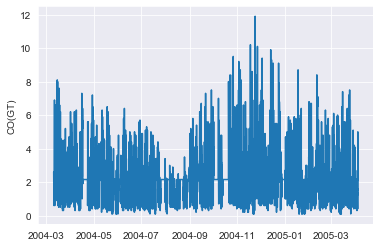

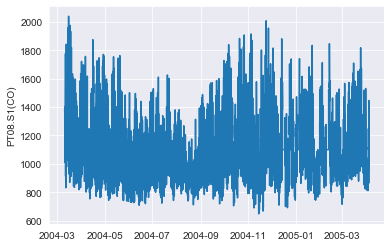

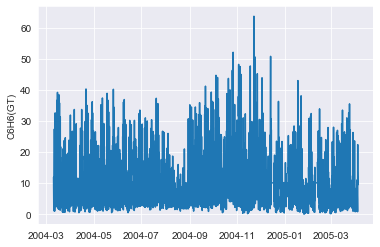

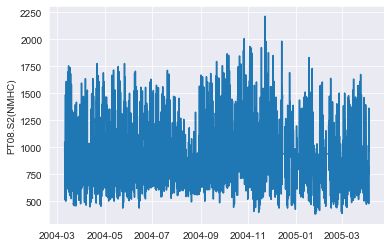

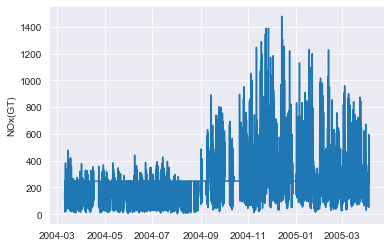

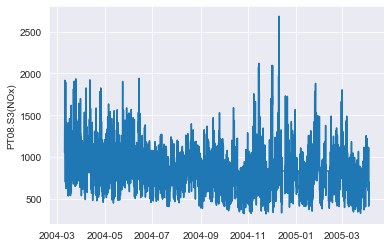

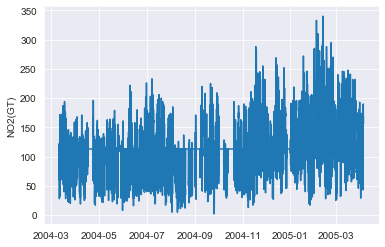

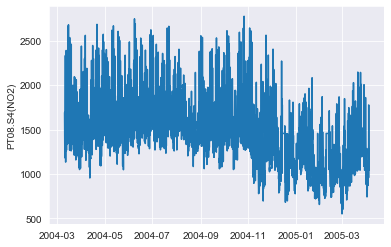

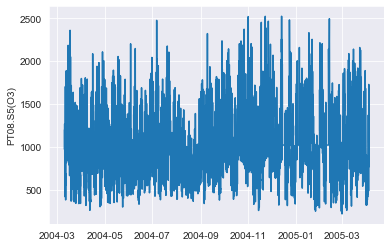

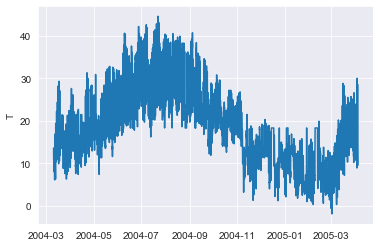

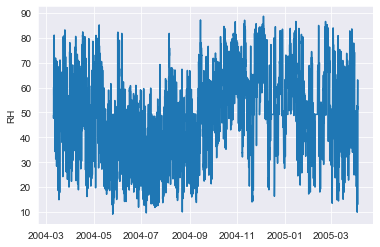

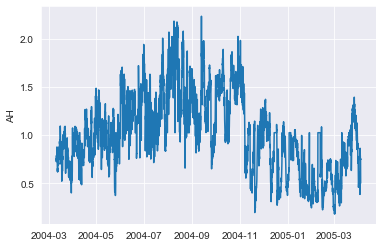

In [111]:
# PLot of how the measurements change over time.
numerical_cols=[]
for col in air.columns:
    if air[col].dtype == 'float64':
        numerical_cols.append(col)
for i in numerical_cols:
    plt.figure()
    plt.plot(air[i])
    plt.ylabel(i)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x19f996bbd48>,
 'caps': [<matplotlib.lines.Line2D at 0x19f9861b748>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f9ac67ac8>,
 'medians': [<matplotlib.lines.Line2D at 0x19f98615148>,
 'fliers': [<matplotlib.lines.Line2D at 0x19f901d2708>,
 'means': []}

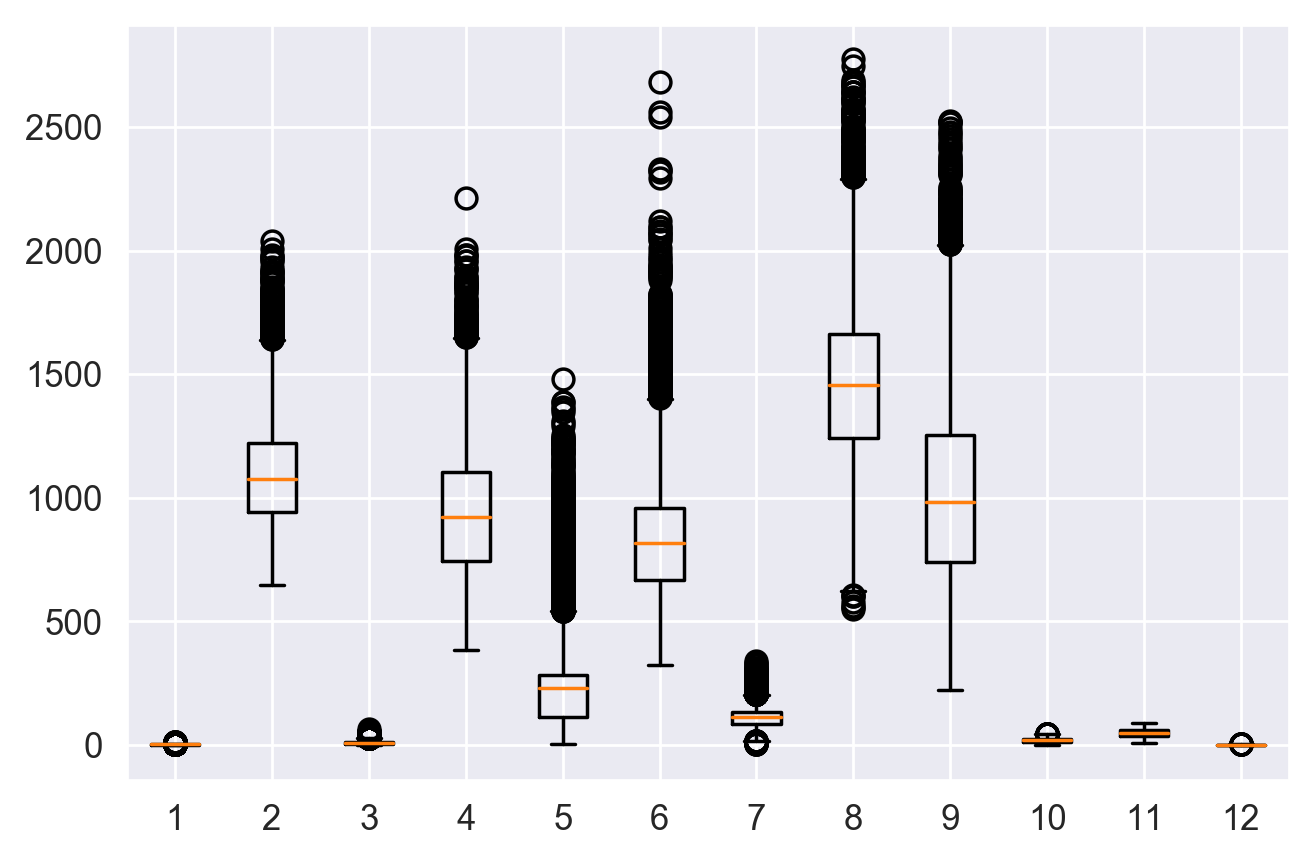

In [112]:
# Checking the prescence of outliers using a boxplot
plt.figure(dpi=250)
plt.boxplot(air[numerical_cols].values)

## Model 1: ARIMA(Autoregressive Moving Average)

In [113]:
from statsmodels.tsa.stattools import adfuller
split = len(air) - int(0.2*len(air)) 
train, test = air['T'][0:split], air ['T'][split:] 
# Augmented Dickey-Fuller test to test of Temperature is a stationary time series or not.
# The null hypothesis of the test is that a unit root is present in a time series sample.
result=adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('critical values')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key,value))


ADF Statistic: -3.641690
p-value: 0.005012
critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567


> Since the P value is less than 0.05 and the ADF statistic is less than the critical value, we fail to reject the null hypothesis that Temperature is a stationary time series attribute.


In [114]:
# Confirming the stationality of the time series using Hurst exponent.
import hurst
H, c, data = hurst.compute_Hc(train)
print('H = {:.4f}, c = {:.4f}'.format(H,c))

H = 0.2077, c = 4.3226


> The value of H<0.5 shows antipersistent behavior, and H>0.5 shows persistent behavior or a trending series. H=0.5 shows random walk/Brownin motion. The value of H in our test is less thn 0.5 therefore confirming that our time series is stationary.

Since our time series is stationary, we will set the 'd' parameter in the model as 1.

In [128]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.values, order = (5, 0, 2))
model_fit = model.fit(disp=False)

In [129]:
predictions = model_fit.predict(len(test))
test_ = pd.DataFrame(test)
test_['Predictions'] = predictions[0:1871]

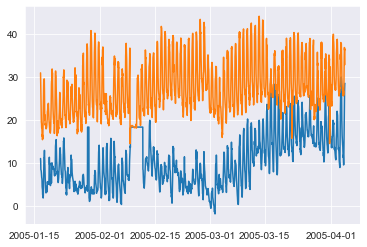

In [130]:
plt.plot(test)
plt.plot(test_.Predictions)
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test.values, predictions[0:1871]))
print('Test RMSE for ARIMA: ', error)

Test RMSE for ARIMA:  18.492910315918266


In [119]:
test.describe()

count    1871.000000
mean       10.370301
std         6.134573
min        -1.900000
25%         5.300000
50%         9.300000
75%        14.500000
max        30.000000
Name: T, dtype: float64

> the model performance is very poor sicnce the RMSE is orders of magnitude greater than the accepted value of 10% of the mean, 10.37.

# Model 2: Exponential Smoothing

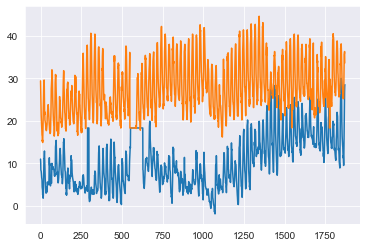

In [131]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train.values)
model = model.fit()
predictions=model.predict(len(test))
plt.plot(test.values)
plt.plot(predictions[1:1871])

In [133]:
print('RMSE for Exponential Smoothing: ', np.sqrt(mean_squared_error(test, predictions[0:1871])))

RMSE for Exponential Smoothing:  18.544702025793868


> MOdel 2's performance is slightly worse than ARIMA

## Walk Forward Validation

In [136]:
pred = []
data = train.values
for t in test.values:
    model = (ExponentialSmoothing(data).fit())
    y=model.predict()
    pred.append(y[0])
    data = np.append(data, t)

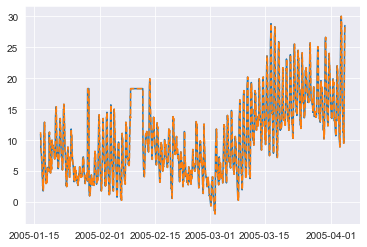

In [137]:
test_ = pd.DataFrame(test)
test_['predictionswf'] = pred
plt.plot(test_['T'])
plt.plot(test_.predictionswf,'--')

In [138]:
print('RMSE for triple Exponential Smoothing with Walk Forward validation', np.sqrt(mean_squared_error(test.values, pred)))

RMSE for triple Exponential Smoothing with Walk Forward validation 1.3444763968508406


> Triple Exponential Smoothing with walk forward validation is our best performing model so far with an RMSE closer to 10% of the mean. In fact the model is working so much better that the predictions are sometimes overlapping the actual values.

# Model 3: Prophet Model

In [139]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'